# Visualization using matplotlib and seaborn

** Visualization strategy: ** 
    
    - Single variable
        - numeric continuous variable
            - histogram: distribution of values
            - boxplot: outlier analysis
        - Categorical (string or discrete numeric)
            - frequency plot
    - Association plot 
        - continuous vs continuous: scatter plot
        - continuous vs categorical: vertical bar and boxplot (regression problems)
        - categorical vs continuous: horizontal bar (classification problems)
        - categorical vs categorical: heapmap
    
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.mlab import normpdf

%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 6

In [2]:
df = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.data", sep=r"\s+")
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null float64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [4]:
df["year"].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [5]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
377,38.0,4,105.0,63.00,2125.0,14.7,82,1,plymouth horizon miser
41,14.0,8,318.0,150.0,4096.0,13.0,71,1,plymouth fury iii
293,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
227,19.0,6,225.0,100.0,3630.0,17.7,77,1,plymouth volare custom
204,32.0,4,85.0,70.00,1990.0,17.0,76,3,datsun b-210
18,27.0,4,97.0,88.00,2130.0,14.5,70,3,datsun pl510
132,25.0,4,140.0,75.00,2542.0,17.0,74,1,chevrolet vega
332,29.8,4,89.0,62.00,1845.0,15.3,80,2,vokswagen rabbit
104,12.0,8,400.0,167.0,4906.0,12.5,73,1,ford country


# Visualization for a single continuous variable

Text(0,0.5,'Frequency')

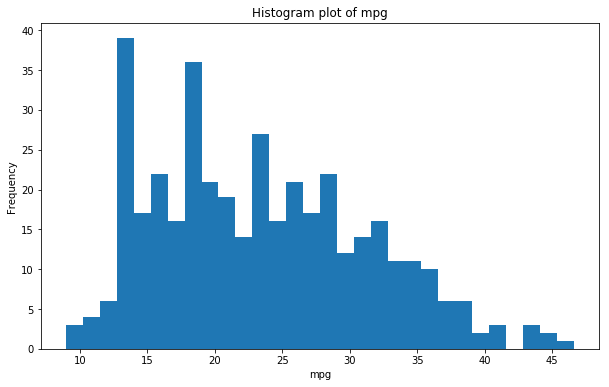

In [6]:
plt.hist(df["mpg"], bins = 30)
plt.title("Histogram plot of mpg")
plt.xlabel("mpg")
plt.ylabel("Frequency")

Text(0,0.5,'mpg')

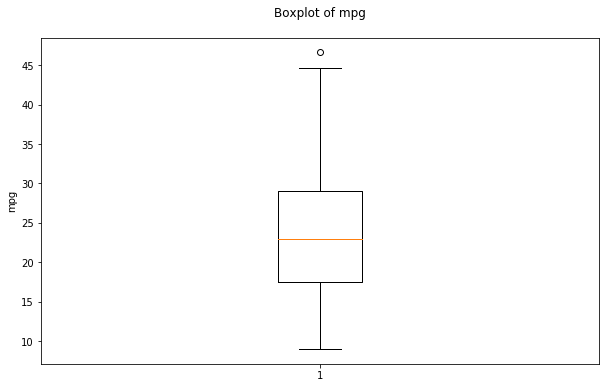

In [7]:
plt.boxplot(df["mpg"])
plt.title("Boxplot of mpg\n ")
plt.ylabel("mpg")

Text(0.5,33,'MPG')

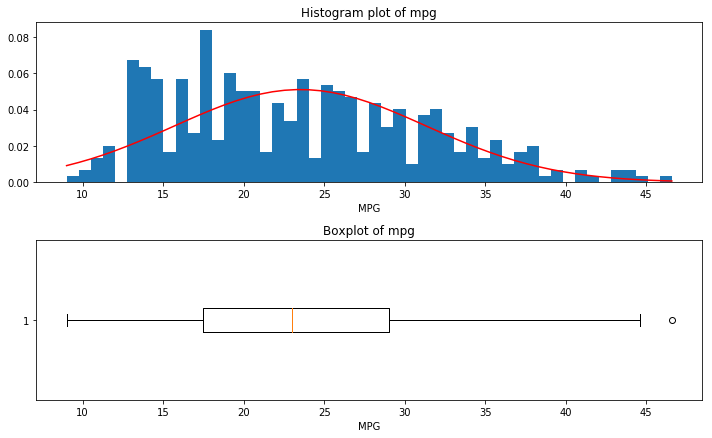

In [8]:
#plt.figure(figsize = (10, 6))
plt.subplot(2, 1, 1)
n, bins, patches = plt.hist(df["mpg"], bins = 50, normed = True)
plt.title("Histogram plot of mpg")
plt.xlabel("MPG")

pdf = normpdf(bins, df["mpg"].mean(), df["mpg"].std())
plt.plot(bins, pdf, color = "red")

plt.subplot(2, 1, 2)
plt.boxplot(df["mpg"], vert=False)
plt.title("Boxplot of mpg")
plt.tight_layout()
plt.xlabel("MPG")

In [9]:
normpdf(bins, df["mpg"].mean(), df["mpg"].std())

array([ 0.00912588,  0.0108562 ,  0.0127959 ,  0.01494355,  0.01729125,
        0.01982389,  0.02251859,  0.02534448,  0.02826282,  0.03122751,
        0.03418606,  0.03708093,  0.03985125,  0.0424349 ,  0.04477073,
        0.046801  ,  0.04847366,  0.04974465,  0.05057976,  0.0509562 ,
        0.0508636 ,  0.05030452,  0.0492943 ,  0.0478604 ,  0.0460411 ,
        0.04388387,  0.04144327,  0.03877867,  0.03595189,  0.03302481,
        0.03005722,  0.02710485,  0.02421782,  0.02143942,  0.01880533,
        0.01634325,  0.01407298,  0.01200669,  0.01014963,  0.00850095,
        0.00705463,  0.00580057,  0.0047256 ,  0.00381446,  0.0030507 ,
        0.00241744,  0.00189802,  0.00147651,  0.00113805,  0.00086912,
        0.00065763])

Text(0.5,0,'mpg')

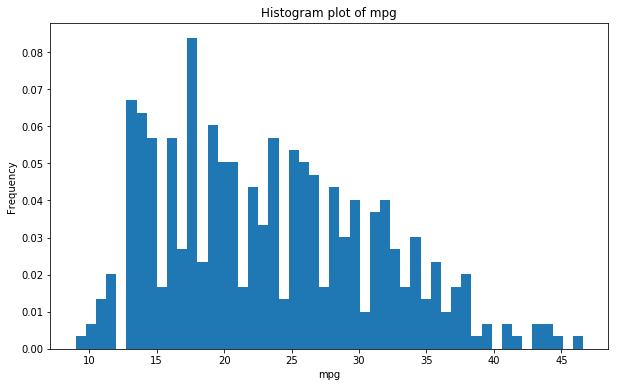

In [10]:
# using pandas plot function
plt.figure(figsize = (10, 6))
df.mpg.plot.hist(bins = 50, normed = True)
plt.title("Histogram plot of mpg")
plt.xlabel("mpg")

# Visualization for single categorical variable - frequency plot

In [11]:
counts = df["year"].value_counts().sort_index()

Text(0.5,1,'Frequency distribution by year')

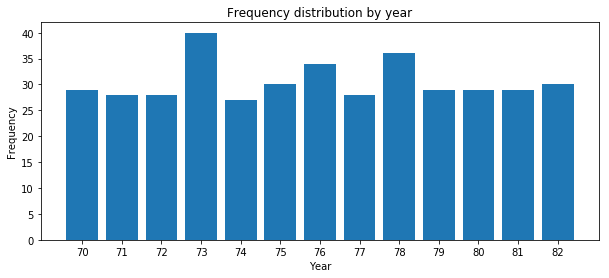

In [12]:
plt.figure(figsize = (10, 4))
plt.bar(range(len(counts)), counts, align = "center")
plt.xticks(range(len(counts)), counts.index)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Frequency distribution by year")

#### Bar plot using matplotlib visualization

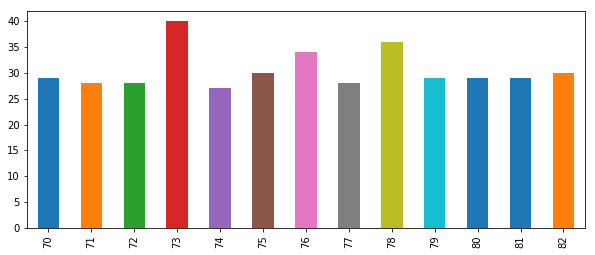

In [13]:
plt.figure(figsize = (10, 4))
df.year.value_counts().sort_index().plot.bar()

# Association plot between two continuous variables

### Continuous vs continuous

Text(0.5,1,'Mpg vs Weight, correlation: -0.83')

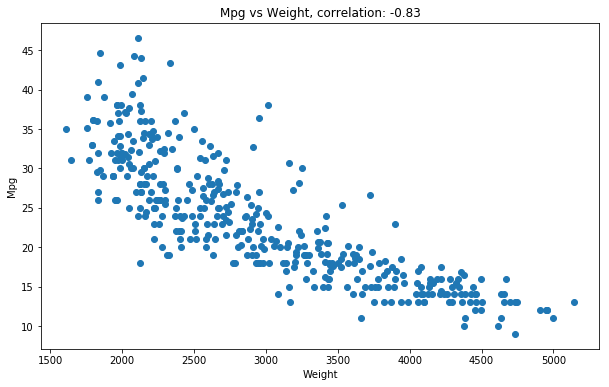

In [14]:
corr = np.corrcoef(df["weight"], df["mpg"])[0, 1]
plt.scatter(df["weight"], df["mpg"])
plt.xlabel("Weight")
plt.ylabel("Mpg")
plt.title("Mpg vs Weight, correlation: %.2f" % corr)

Scatter plot using pandas dataframe plot function

Text(0.5,1,'Mpg vs Weight, correlation: -0.83')

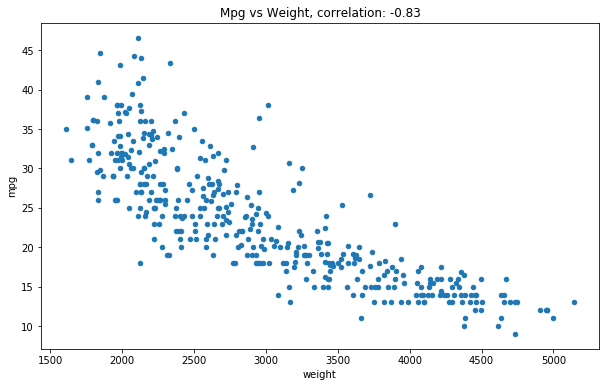

In [15]:
df.plot.scatter(x= "weight", y = "mpg")
plt.title("Mpg vs Weight, correlation: %.2f" % corr)

#### Continuous vs Categorical

In [16]:
mpg_by_year = df.groupby("year")["mpg"].agg([np.median, np.std])
mpg_by_year.head()

,median,std
year,,
70,16.0,5.339231
71,19.0,6.591942
72,18.5,5.435529
73,16.0,4.700245
74,24.0,6.420010


Text(0,0.5,'MPG')

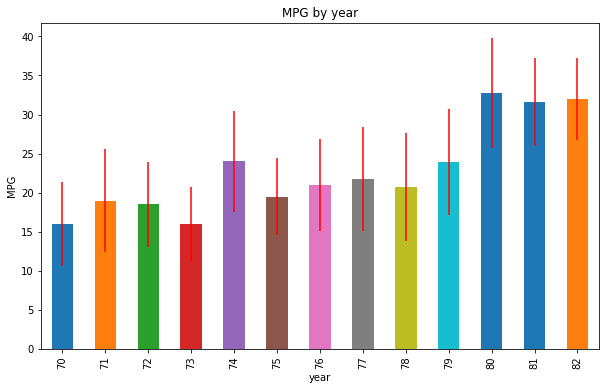

In [17]:
mpg_by_year["median"].plot.bar(yerr = mpg_by_year["std"], ecolor = "red")
plt.title("MPG by year")
plt.xlabel("year")
plt.ylabel("MPG")

Show the boxplot of MPG by year  

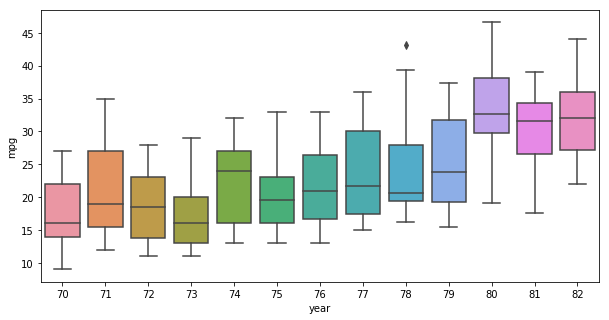

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot("year", "mpg", data = df)

#### Association plot between 2 categorical variables

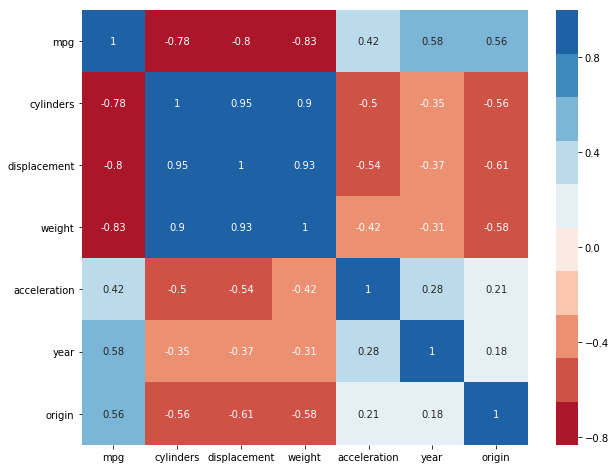

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap=sns.color_palette("RdBu", 10), annot=True)

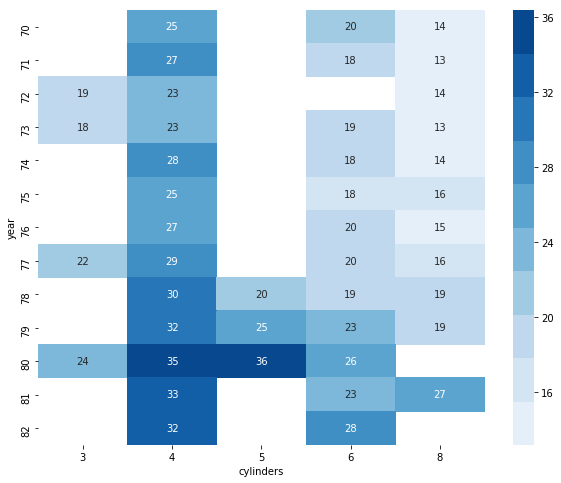

In [20]:
plt.figure(figsize=(10, 8))
aggr = df.groupby(["year", "cylinders"])["mpg"].agg(np.mean).unstack()
sns.heatmap(aggr, cmap=sns.color_palette("Blues", n_colors= 10), annot=True)

## Classificaition plot

In [21]:
iris = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


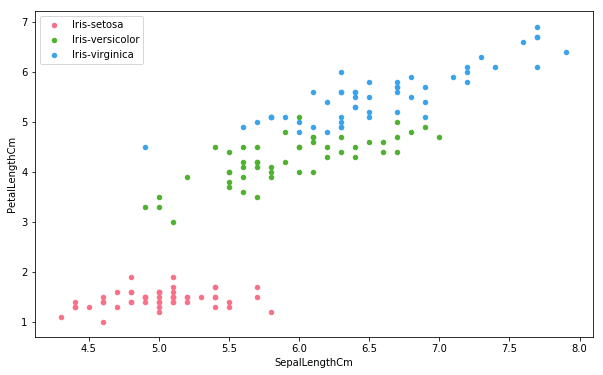

In [22]:
fig, ax = plt.subplots()
x1, x2 = "SepalLengthCm", "PetalLengthCm"
cmap = sns.color_palette("husl", n_colors=3)
for i, c in enumerate(iris.Species.unique()):
    iris[iris.Species == c].plot.scatter(x1, x2, color = cmap[i], label = c, ax = ax)
plt.legend()

# QQ Plot for normality test

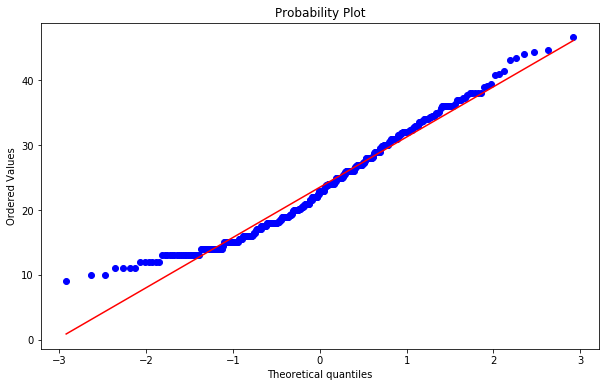

In [23]:
import scipy.stats as stats
p = stats.probplot(df["mpg"], dist="norm", plot=plt)